In [1]:

import gdown
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img
from tensorflow.keras import layers, models
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [5]:
zip_id = "1ar0oM1-7IPeY3x4Qqi3QQPiN3mxSrzco"
gdown.download(f"https://drive.google.com/uc?id={zip_id}", output="dataset_mata_1.zip", quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1ar0oM1-7IPeY3x4Qqi3QQPiN3mxSrzco
From (redirected): https://drive.google.com/uc?id=1ar0oM1-7IPeY3x4Qqi3QQPiN3mxSrzco&confirm=t&uuid=27e35da2-de80-46a2-b38d-a10fae2663f4
To: c:\Users\cahya\OneDrive\Documents\AI\dataset_mata_1.zip
  0%|          | 14.7M/3.20G [00:07<21:50, 2.43MB/s]

KeyboardInterrupt: 

  0%|          | 14.7M/3.20G [00:20<21:50, 2.43MB/s]

In [6]:
with zipfile.ZipFile("dataset_mata_1.zip", "r") as zip_ref:
    zip_ref.extractall()

In [2]:
csv_url='https://drive.google.com/uc?id=1Em6aYEQwqyuquhqDopKSCDtJQ4tlvjfj'
df1 = pd.read_csv(csv_url)

label_map = {
    0: 'No DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferative DR'
}

df1['label'] = df1['diagnosis'].map(label_map)

# Cek hasil
print(df1.head())

                 id_code  diagnosis  label
0  20170413102628830.jpg          0  No DR
1  20170413111955404.jpg          0  No DR
2  20170413112015395.jpg          0  No DR
3  20170413112017305.jpg          0  No DR
4  20170413112528859.jpg          0  No DR


diagnosis
0    6266
2    4477
4     913
1     630
3     236
Name: count, dtype: int64


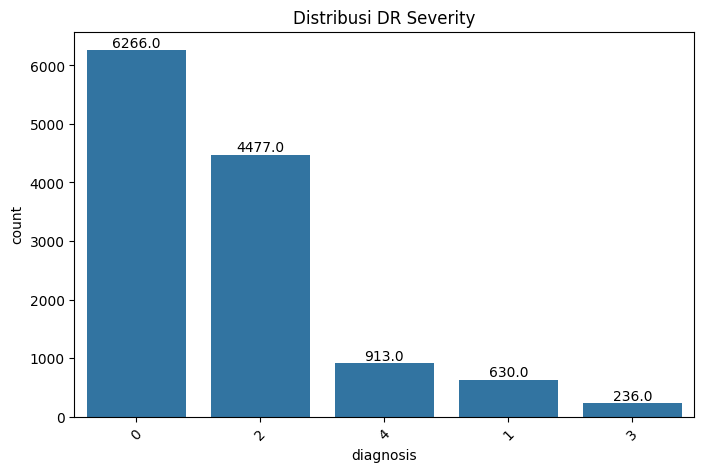

In [7]:
# Tampilkan count per label
print(df1['diagnosis'].value_counts())

# Buat plot
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='diagnosis', data=df1, order=df1['diagnosis'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi DR Severity")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()


In [15]:
# Load data label
df2 = pd.read_csv("trainLabels.csv")
print("Contoh label:")
print(df2.head())

# Load data label
df2 = pd.read_csv("trainLabels.csv")

# Mapping diagnosis numerik ke label teks
label_map = {
    0: 'No DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferative DR'
}
df2['label'] = df2['level'].map(label_map)

print("Contoh label:")
print(df2.head())


# Folder gambar asli
image_folder = "dataset_mata_2/train"

# Folder output
output_base = "sorted_dataset_2"

# Cek isi folder gambar (debug)
all_images = os.listdir(image_folder)
print(f"\nJumlah total gambar ditemukan: {len(all_images)}")

# Proses pemindahan
not_found = 0
for _, row in df2.iterrows():
    filename_base = row['image']
    diagnosis = str(row['level'])

    # Cari file dengan nama yang sesuai prefix image
    matched_files = [f for f in all_images if f.startswith(filename_base)]

    if matched_files:
        matched_file = matched_files[0]  # Ambil file pertama yang cocok
        src = os.path.join(image_folder, matched_file)
        dst_dir = os.path.join(output_base, diagnosis)
        dst = os.path.join(dst_dir, matched_file)

        os.makedirs(dst_dir, exist_ok=True)
        shutil.move(src, dst)
    else:
        print(f" File tidak ditemukan: {filename_base}")
        not_found += 1

print("Selesai.")


Contoh label:
      image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1
Contoh label:
      image  level  label
0   10_left      0  No DR
1  10_right      0  No DR
2   13_left      0  No DR
3  13_right      0  No DR
4   15_left      1   Mild

Jumlah total gambar ditemukan: 8408
 File tidak ditemukan: 19_left
 File tidak ditemukan: 19_right
 File tidak ditemukan: 20_left
 File tidak ditemukan: 20_right
 File tidak ditemukan: 21_left
 File tidak ditemukan: 21_right
 File tidak ditemukan: 22_left
 File tidak ditemukan: 22_right
 File tidak ditemukan: 23_left
 File tidak ditemukan: 23_right
 File tidak ditemukan: 25_left
 File tidak ditemukan: 25_right
 File tidak ditemukan: 30_left
 File tidak ditemukan: 30_right
 File tidak ditemukan: 31_left
 File tidak ditemukan: 31_right
 File tidak ditemukan: 33_left
 File tidak ditemukan: 33_right
 File tidak ditemukan: 36_left
 File tidak ditemukan: 36_right
 File tidak ditemukan: 40_left
 Fil

In [16]:
# Folder sumber
sources = ['sorted_dataset_1', 'sorted_dataset_2']

# Folder tujuan gabungan
target_base = 'DR_dataset'

# Label folder (kelas) dari 0 sampai 4
classes = ['0', '1', '2', '3', '4']

# Buat folder label di DR_dataset
for label in classes:
    os.makedirs(os.path.join(target_base, label), exist_ok=True)

# Gabungkan semua file dari kedua sumber
for source_base in sources:
    for label in classes:
        src_dir = os.path.join(source_base, label)
        dst_dir = os.path.join(target_base, label)

        if not os.path.exists(src_dir):
            continue  # skip jika folder tidak ada

        for filename in os.listdir(src_dir):
            src_file = os.path.join(src_dir, filename)
            dst_file = os.path.join(dst_dir, filename)

            # Hindari overwrite jika nama file sama
            if os.path.exists(dst_file):
                base, ext = os.path.splitext(filename)
                i = 1
                while True:
                    new_filename = f"{base}_{i}{ext}"
                    dst_file = os.path.join(dst_dir, new_filename)
                    if not os.path.exists(dst_file):
                        break
                    i += 1

            shutil.move(src_file, dst_file)

print("✅ Semua dataset berhasil digabung ke dalam folder 'DR_dataset'")


✅ Semua dataset berhasil digabung ke dalam folder 'DR_dataset'


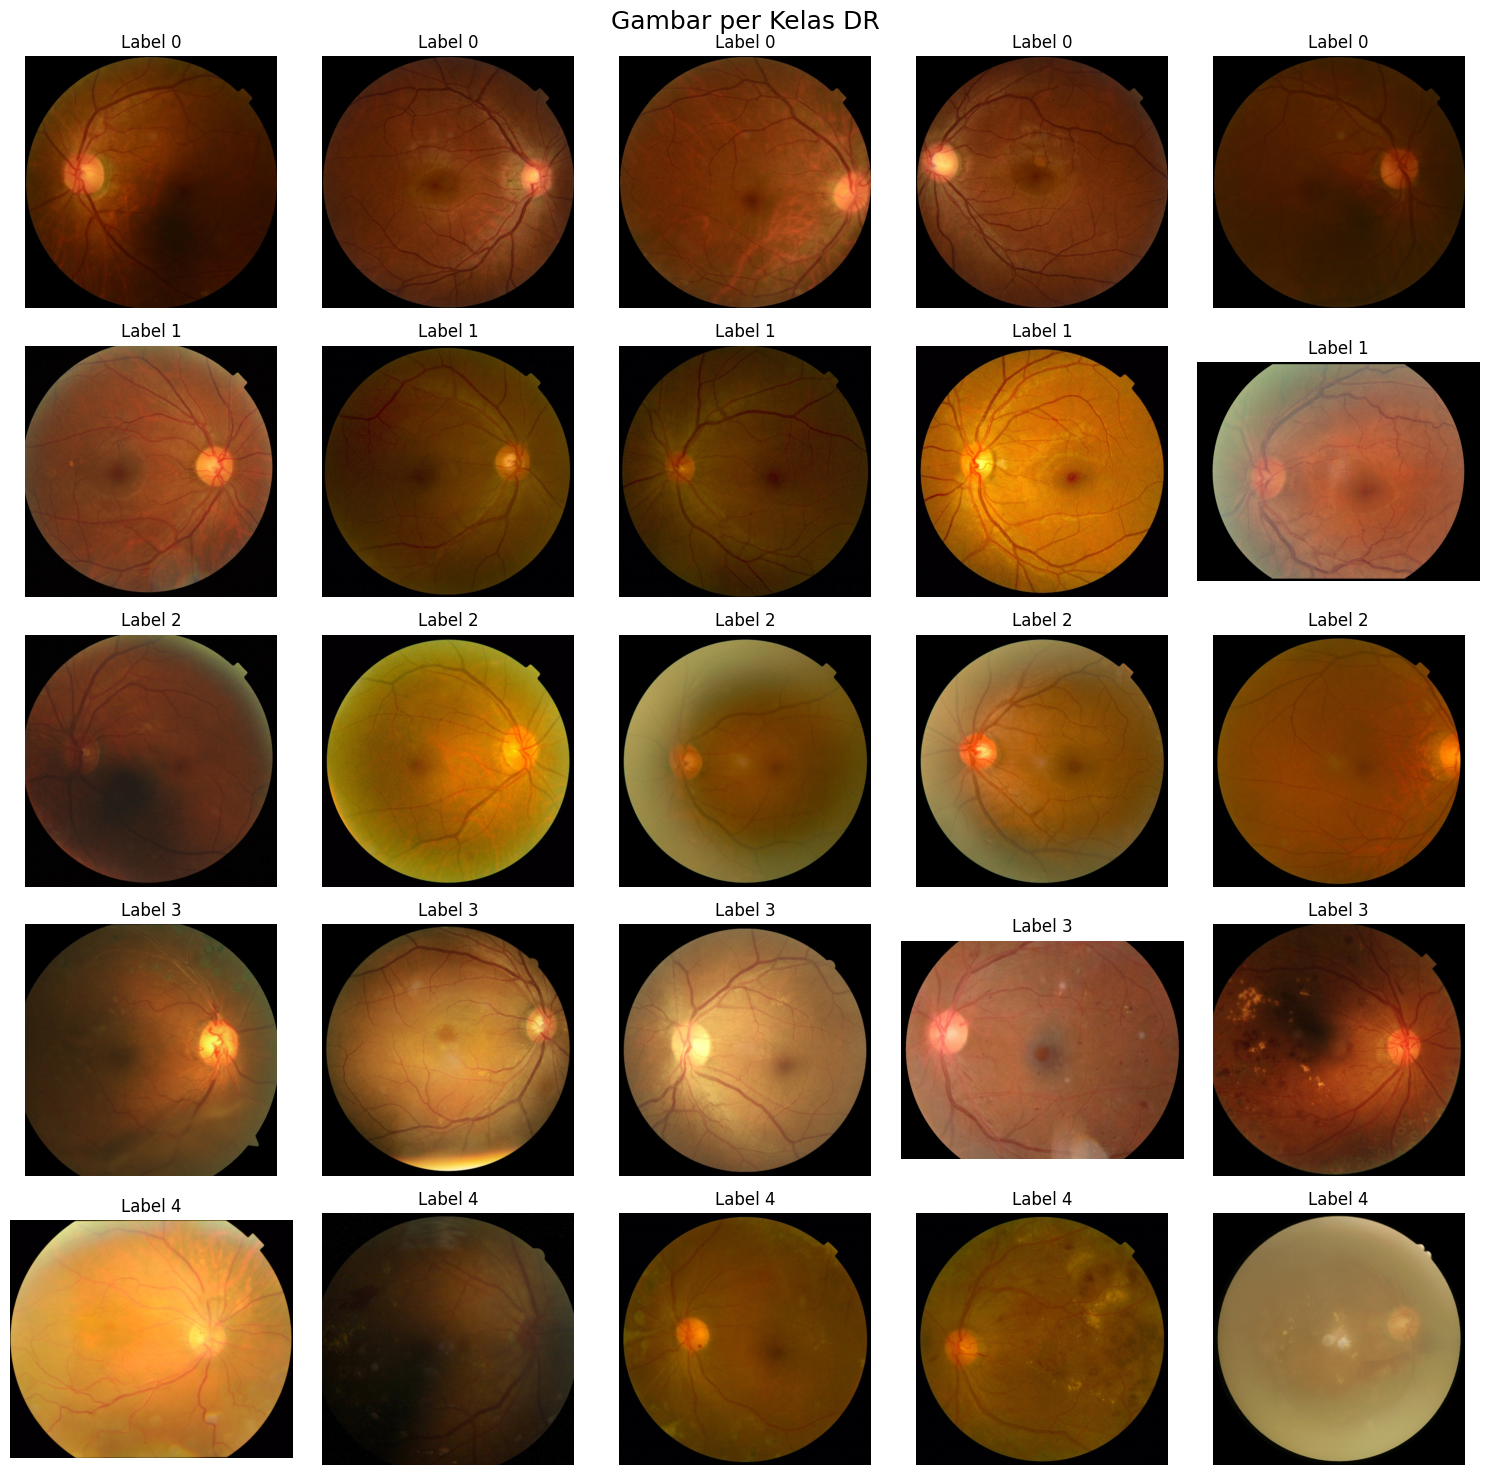

In [17]:
# Folder dasar dataset tersortir
base_folder = "DR_dataset"
labels = ['0', '1', '2', '3', '4']
images_per_label = 5

# Setup plot grid 5x5
plt.figure(figsize=(15, 15))

img_index = 1
for label in labels:
    folder = os.path.join(base_folder, label)
    images = os.listdir(folder)[:images_per_label]  # Ambil 5 gambar pertama
    for img_name in images:
        img_path = os.path.join(folder, img_name)
        try:
            img = mpimg.imread(img_path)
            plt.subplot(5, 5, img_index)
            plt.imshow(img)
            plt.title(f"Label {label}")
            plt.axis('off')
            img_index += 1
        except Exception as e:
            print(f"Gagal buka gambar {img_path}: {e}")

plt.suptitle("Gambar per Kelas DR", fontsize=18)
plt.tight_layout()
plt.show()

Jumlah gambar per label:
Label 0: 12416 gambar
Label 1: 1218 gambar
Label 2: 5760 gambar
Label 3: 457 gambar
Label 4: 1079 gambar


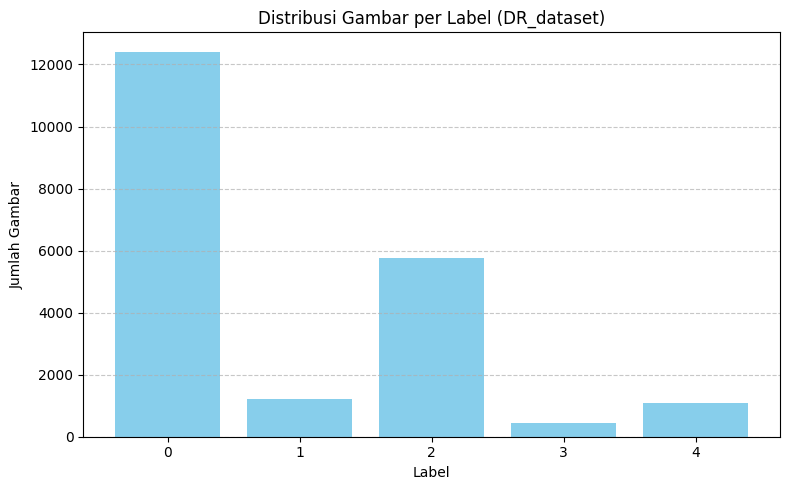

In [18]:
# Path ke folder dataset gabungan
dataset_path = 'DR_dataset'

# Ambil daftar folder label (misal: 0, 1, 2, 3, 4)
label_folders = sorted([f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))])

# Hitung jumlah gambar per label
label_counts = {}
for label in label_folders:
    folder_path = os.path.join(dataset_path, label)
    count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    label_counts[label] = count

# Tampilkan hasil
print("Jumlah gambar per label:")
for label, count in label_counts.items():
    print(f"Label {label}: {count} gambar")

# Visualisasi
plt.figure(figsize=(8, 5))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.xlabel('Label')
plt.ylabel('Jumlah Gambar')
plt.title('Distribusi Gambar per Label (DR_dataset)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
source_base = 'DR_dataset'
target_base = 'augmented_dataset_2'

# Buat target folder untuk masing-masing kelas
for label in ['0', '1', '2', '3', '4']:
    os.makedirs(os.path.join(target_base, label), exist_ok=True)


In [37]:
augmentor = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    brightness_range=(0.8, 1.2),
    channel_shift_range=20.0,
    fill_mode="nearest"
)


def augment_images(label, target_count):
    source_folder = os.path.join(source_base, label)
    target_folder = os.path.join(target_base, label)
    image_files = os.listdir(source_folder)
    current_count = len(image_files)

    if current_count >= target_count:
        # Salin semua saja kalau cukup
        for img_name in image_files:
            src_path = os.path.join(source_folder, img_name)
            dst_path = os.path.join(target_folder, img_name)
            shutil.copy(src_path, dst_path)
    else:
        # Salin yang ada
        for img_name in image_files:
            shutil.copy(os.path.join(source_folder, img_name), os.path.join(target_folder, img_name))

        # Augment sampai memenuhi target_count
        print(f"Augmenting label {label} dari {current_count} ke {target_count}")
        i = 0
        while len(os.listdir(target_folder)) < target_count:
            img_name = image_files[i % current_count]
            img_path = os.path.join(source_folder, img_name)

            img = load_img(img_path)
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            # Simpan hasil augmentasi
            gen = augmentor.flow(x, batch_size=1)
            aug_img = next(gen)[0]
            save_img(os.path.join(target_folder, f"aug_{i}_{img_name}"), aug_img)
            i += 1


In [42]:
# Target jumlah per kelas untuk augmentasi minoritas
target_per_class = {
    '0': 13500,
    '1': 13000,
    '2': 13000,
    '3': 13000,
    '4': 13000
}


for label, target in target_per_class.items():
    augment_images(label, target)

Augmenting label 0 dari 12416 ke 13500
Augmenting label 1 dari 1218 ke 13000
Augmenting label 2 dari 5760 ke 13000
Augmenting label 3 dari 457 ke 13000
Augmenting label 4 dari 1079 ke 13000


In [43]:
# from google.colab import files
base_dir = 'augmented_dataset_2'

filepaths = []
labels = []

for label in os.listdir(base_dir):
    label_dir = os.path.join(base_dir, label)
    if os.path.isdir(label_dir):
        for fname in os.listdir(label_dir):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                filepaths.append(os.path.join(base_dir, label, fname))
                labels.append(int(label))

df = pd.DataFrame({
    'filepath': filepaths,
    'label': labels
})

In [44]:
# Simpan CSV ke dalam folder augmented_dataset
csv_path = os.path.join(base_dir, 'augmented_dataset_info.csv')
df.to_csv(csv_path, index=False)



In [45]:
def validate_images_with_tf(directory):
    num_invalid = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                path = os.path.join(root, file)
                try:
                    raw = tf.io.read_file(path)
                    _ = tf.image.decode_jpeg(raw)  # Ini akan raise jika corrupt
                except Exception as e:
                    print(f"Removing (TF decode failed): {path} - Reason: {e}")
                    try:
                        os.remove(path)
                        num_invalid += 1
                    except Exception as remove_error:
                        print(f"Could not remove {path}: {remove_error}")
    print(f"Total TF-invalid images removed: {num_invalid}")

validate_images_with_tf("augmented_dataset")



Total TF-invalid images removed: 0
